In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
import mysql.connector
import warnings
import os
import json
warnings.filterwarnings('ignore')

# Conexión a la Base de Datos

In [2]:
# Conexión a la Base de Datos
# Valores de Configuración
HOST='localhost'
USER='erikssonherlo'
PASS='201830459'
DATABASE='dataset'

# Establece la conexión
connection = mysql.connector.connect(host=HOST, user=USER, password=PASS, database=DATABASE)

# Crea un objeto cursor para ejecutar consultas SQL
cursor = connection.cursor()

# Resumen de Muertes Global
query1 = 'SELECT * FROM death WHERE register_type = 1'
cursor.execute(query1)
results1 = cursor.fetchall()

# Resumen de Muertes por Municipio
query2 = 'SELECT * FROM death WHERE register_type = 2'
cursor.execute(query2)
results2 = cursor.fetchall()


# Cierra el cursor y la conexión
cursor.close()
connection.close()

# Convierte los resultados en DataFrames de Pandas
column_names1 = [i[0] for i in cursor.description]
df_summary = pd.DataFrame(results1, columns=column_names1)

column_names2 = [i[0] for i in cursor.description]
df_municipality = pd.DataFrame(results2, columns=column_names2)

## Carga de Datos, desde la Base de Datos
### Datos del Resumen de Muertes Globales

In [3]:
# Muestra los DataFrames
print(df_summary)

          id        date    country departament municipality  population  \
0          1  2020-01-05  Guatemala       TOTAL        TOTAL    17109746   
1          2  2020-01-12  Guatemala       TOTAL        TOTAL    17109746   
2          3  2020-01-19  Guatemala       TOTAL        TOTAL    17109746   
3          4  2020-01-26  Guatemala       TOTAL        TOTAL    17109746   
4          5  2020-02-02  Guatemala       TOTAL        TOTAL    17109746   
...      ...         ...        ...         ...          ...         ...   
13359  99888  2020-11-29  Guatemala       TOTAL        TOTAL    17109746   
13360  99889  2020-12-06  Guatemala       TOTAL        TOTAL    17109746   
13361  99890  2020-12-13  Guatemala       TOTAL        TOTAL    17109746   
13362  99891  2020-12-20  Guatemala       TOTAL        TOTAL    17109746   
13363  99892  2020-12-27  Guatemala       TOTAL        TOTAL    17109746   

       new_deaths  cumulative_deaths register_type  
0               0                 

### Datos de Muertes por Municipios

In [4]:
print(df_municipality)

           id        date    country     departament            municipality  \
0          11  2020-03-15  Guatemala     TOTONICAPAN  SANTA LUCIA LA REFORMA   
1          12  2020-03-15  Guatemala          QUICHE                 CANILLA   
2          13  2020-03-15  Guatemala          SOLOLA        SAN JOSE CHACAYA   
3          14  2020-03-15  Guatemala       GUATEMALA  SAN PEDRO SACATEPEQUEZ   
4          15  2020-03-15  Guatemala           PETEN                SAN LUIS   
...       ...         ...        ...             ...                     ...   
86861  100226  2020-12-31  Guatemala  QUETZALTENANGO                   ZUNIL   
86862  100227  2020-12-31  Guatemala       ESCUINTLA      SAN VICENTE PACAYA   
86863  100228  2020-12-31  Guatemala           PETEN              LAS CRUCES   
86864  100229  2020-12-31  Guatemala      RETALHULEU              CHAMPERICO   
86865  100230  2020-12-31  Guatemala      SAN MARCOS                EL RODEO   

       population  new_deaths  cumulati

# EDA Monovariable
El análisis exploratorio de datos (EDA) monovariable realizado revela información valiosa sobre diversas variables cuantitativas y cualitativas en el conjunto de datos. A continuación, se presenta un resumen descriptivo de los hallazgos:
## Datos Cuantitativos
### Variables Cuantitativa - Nuevas Muertes (new_deaths):

#### Estadísticos Descriptivos: 
- **Descripción**

In [5]:
# Variables Cuantitativas
df_new_deaths = df_summary[['new_deaths']]
df_new_deaths.describe()

,new_deaths
count,13364.000000
mean,91.596154
std,88.973562
min,0.000000
25%,0.750000
50%,84.500000
75%,151.000000
max,304.000000


- **Valores Unicos:**

In [6]:
df_summary['new_deaths'].unique()

array([  0,   1,   2,   4,   6,   5,  23,  37, 126, 135, 132, 189, 208,
       259, 304, 256, 258, 240, 158, 225, 148, 117, 104, 156, 108,  72,
        80, 150,  94, 120,  82, 109, 154,  87,  78, 166, 219, 139])

#### Grafica de Caja (Boxplot): 
Un boxplot es una representación gráfica que nos proporciona información sobre la distribución de un conjunto de datos. 

**Elementos del Boxplot**

- Caja (Box): La caja del boxplot representa el rango intercuartílico (IQR), que es la distancia entre el primer cuartil (Q1) y el tercer cuartil (Q3). La línea dentro de la caja indica la mediana (Q2).

- Bigotes (Whiskers): Los bigotes se extienden desde la caja hasta los valores más extremos dentro de un cierto rango llamado "longitud del bigote". Los valores fuera de este rango se consideran "valores atípicos" y se representan como puntos individuales.

- Líneas Adicionales: Pueden haber líneas adicionales dentro del boxplot para representar valores específicos o umbrales.


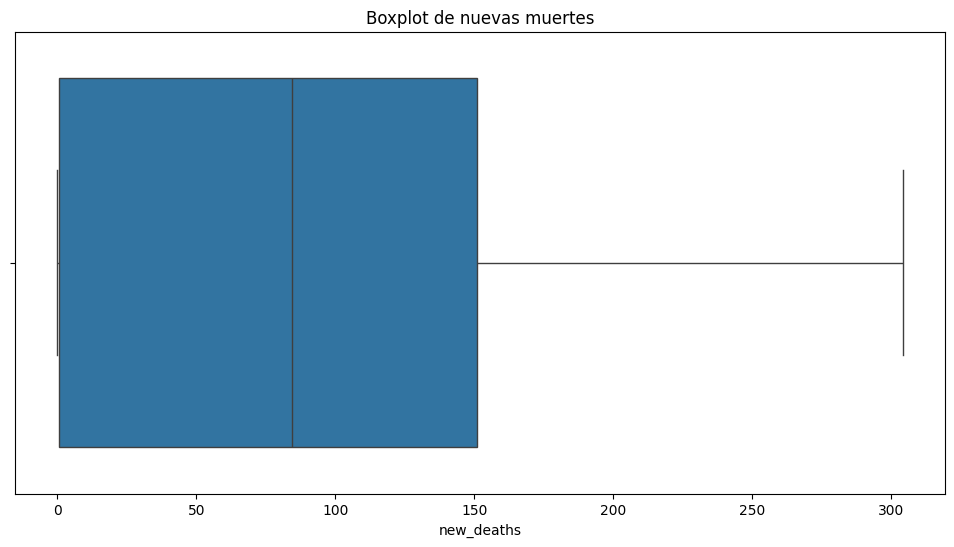

In [7]:
# Palette
my_palette = ['#221f1f', '#b20710', '#e50914','#f5f5f1']
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='new_deaths', data=df_new_deaths, orient='h')
ax.set_title('Boxplot de nuevas muertes')
plt.show()


**Descripción del Boxplot**
- Inicio en 0 y Finalización en 150: La caja y los bigotes se extienden desde 0 hasta 150, cubriendo el rango completo de datos.

- Línea entre 50 y 100: Dentro del boxplot, hay una línea horizontal que representa algún valor específico o umbral. En este caso, la línea está entre 50 y 100. Esto podría ser una referencia importante, como un límite crítico o un valor de interés. 

**Interpretación Visual**

En la visualización del boxplot, podemos observar una caja que abarca desde 0 hasta 150 en el eje y. En nuestro caso, al no haber valores atípicos, no se visualiza ningun tipo de punteo más allá de los bigotes Además, podemos notar una línea vertical entre 50 y 100, que podría indicar un rango específico de interés o algún límite relevante. En nuestro caso, dicho valor es la mediana, que se situa en 84, lo que indica que es el valor medio de la distribución, y es un palor importante para comprender la ubicación central de nuestros datos

## Histograma
- Eje X (Horizontal): Representa los valores posibles de la variable que estás observando (en nuestro caso, 'Nuevas Muertes').

- Eje Y (Vertical): Indica la frecuencia o densidad de ocurrencia de esos valores.

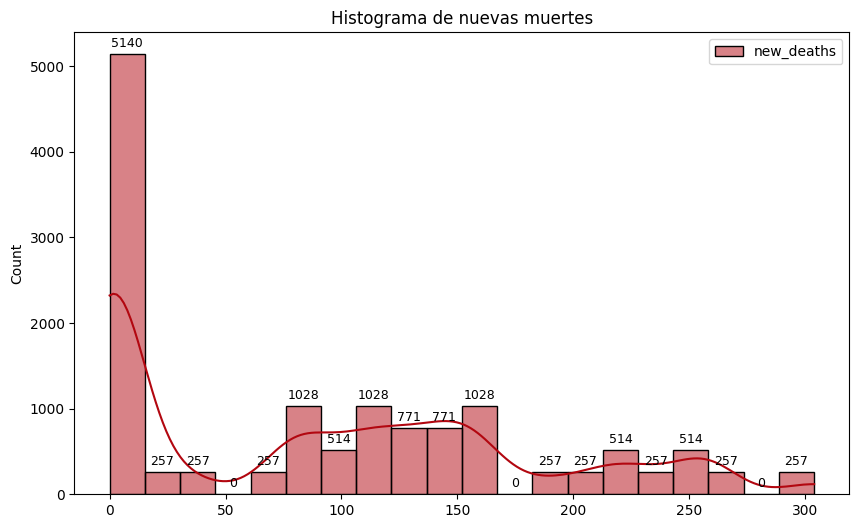

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df_new_deaths, kde=True, bins=20, palette=my_palette[1:])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2.,
p.get_height()),
ha='center', va='baseline', fontsize=9, color='black',
xytext=(0, 5),
textcoords='offset points')
ax.set_title('Histograma de nuevas muertes')
plt.show()

**Visualización de la Información:**
Podemos observar dónde se concentran la mayoría de las nuevas muertes.
- Si hay una cola hacia la derecha, podría haber casos de días con un gran número de nuevas muertes.
- La mediana (valor medio) se encuentra en la región más alta del histograma.

En resumen, el histograma nos brinda una representación visual de la distribución de tus datos, ayudándote a identificar patrones, tendencias y características importantes.

### Variables Cuantitativa - Muertes Acumuladas (Cumulative Deaths):

#### Estadísticos Descriptivos: 
- **Descripción**

In [9]:
# Variables Cuantitativas
df_cumulative_deaths = df_summary[['cumulative_deaths']]
df_cumulative_deaths.describe()

,cumulative_deaths
count,13364.000000
mean,1587.557692
std,1690.243492
min,0.000000
25%,1.000000
50%,776.000000
75%,3231.000000
max,4763.000000


- **Valores Unicos**

In [10]:
df_summary['cumulative_deaths'].unique()

array([   0,    1,    3,    7,   13,   18,   24,   30,   53,   90,  216,
        351,  483,  672,  880, 1139, 1443, 1699, 1957, 2197, 2355, 2580,
       2728, 2845, 2949, 3105, 3213, 3285, 3365, 3515, 3609, 3729, 3811,
       3920, 4074, 4161, 4239, 4405, 4624, 4763])

#### Boxplot

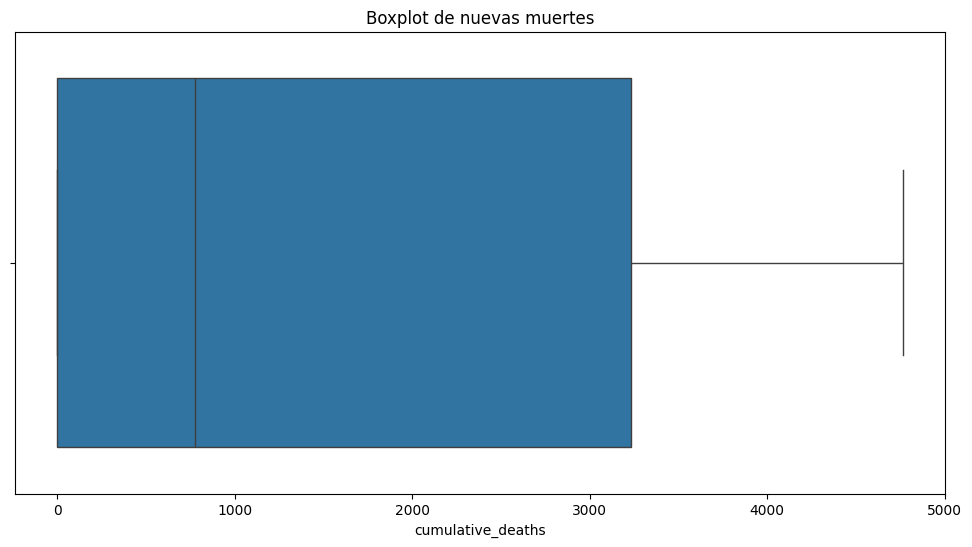

In [11]:
#BoxPlot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='cumulative_deaths', data=df_cumulative_deaths, orient='h')
ax.set_title('Boxplot de nuevas muertes')
plt.show()

**Interpretación Visual**

En la visualización del boxplot, podemos observar una caja que abarca desde 0 hasta mas de 3000 en el eje y. En nuestro caso, al no haber valores atípicos, no se visualiza ningun tipo de punteo más allá de los bigotes. Además, podemos observar una línea vertical entre 0 y 1000, que podría indicar un rango específico de interés o algún límite relevante. En nuestro caso, dicho valor es la mediana, que se situa en 776, lo que indica que es el valor medio de la distribución, y es un palor importante para comprender la ubicación central de nuestros datos

#### Histograma

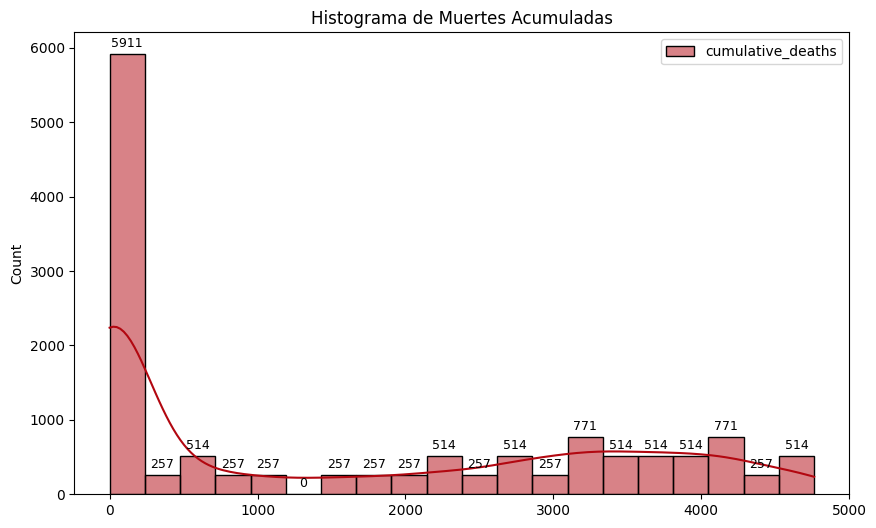

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df_cumulative_deaths, kde=True, bins=20, palette=my_palette[1:])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2.,
p.get_height()),
ha='center', va='baseline', fontsize=9, color='black',
xytext=(0, 5),
textcoords='offset points')
ax.set_title('Histograma de Muertes Acumuladas')
plt.show()

Podemos visualizar que los datos de variables acumuladas se mantuvieron durante varios dias, por lo que significa que no existieron cambios significativos dentro de dichos dias, en cuanto a muertes acumuladas.

### Variables Cuantitativa - Población de Municipios (Population):

#### Estadísticos Descriptivos: 
- **Descripción**

In [13]:
df_municipality_population = df_municipality[['population']]
df_municipality_population.describe()

,population
count,8.686600e+04
mean,4.982360e+04
std,8.138646e+04
min,0.000000e+00
25%,1.739300e+04
50%,3.086200e+04
75%,5.852600e+04
max,1.205668e+06


- **Valores Unicos**

In [14]:
df_municipality['population'].unique()

array([  25461,   12577,    5128,   54623,   76128,   38270,   79777,
         97296,   36047,   58174,   13811,   19514,   23499,   13384,
         35895,   30444,   10996,   23435,   15639,   26146,   10225,
         30134,   28890,   38303,  122466,   18896,   25189,   35071,
          8766,   75979,   32038,   27591,   13971,   50093,   10859,
         10200,   51770,   18222,   91523,   13785,   39350,   81385,
         54845,   21906,   17234,   55723,   27307,   14640,   39337,
        136909,   26686,   13071,   43622,   41552,   41304,   49410,
         97003,   97974,   45162,   73093,   11600,   29356,    4480,
         30017,   14380,   66883,   20579,   11870,   37419,   54382,
          9361,   92103,   25475,   31581,   82876,   76020,   12330,
          8658,   32771,    8724,   23394,   35616,   44819,   39269,
         25716,    8139,   12261,   16339,    8317,    7851,   32963,
         18085,    9088,   46629,   12509,   28097,    2911,   25859,
         13124,   29

#### Boxplot

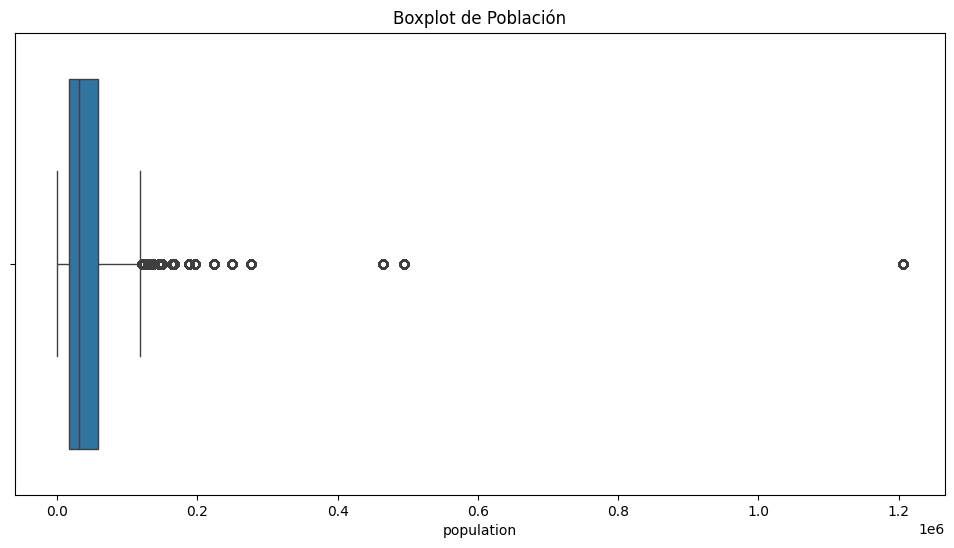

In [15]:
#BoxPlot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='population', data=df_municipality_population, orient='h')
ax.set_title('Boxplot de Población')
plt.show()

El Boxplot contiene datos atipicos, que dado el contexto geografico indican que hay regiones con una alta densidad poblacional, lo que provoca que la información no pueda ser visualizada de manera correcta.

**Transformación:** a pesar de existir dichos valores atipicos, estos no pueden sufrir ningun tipo de transformación, ya que esto los alejaria de la representación fidedigna de la realidad.

#### Histograma

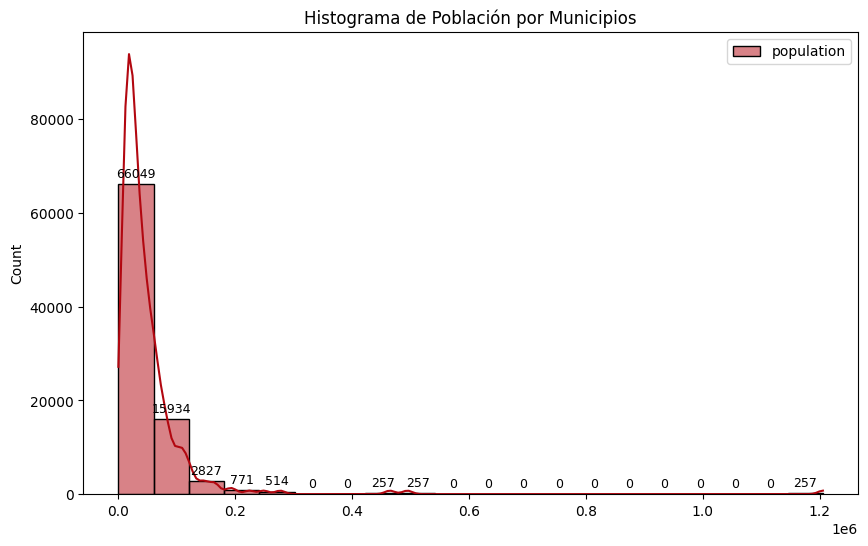

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df_municipality_population, kde=True, bins=20, palette=my_palette[1:])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2.,
p.get_height()),
ha='center', va='baseline', fontsize=9, color='black',
xytext=(0, 5),
textcoords='offset points')
ax.set_title('Histograma de Población por Municipios')
plt.show()

Al igual que con el boxplot, al haber datos atipicos, no podemos visualizar correctamente el histograma

## Datos Cualitativos
### Variables Cualitativa - Departamentos (Departaments)

#### Diagrama de Barras:

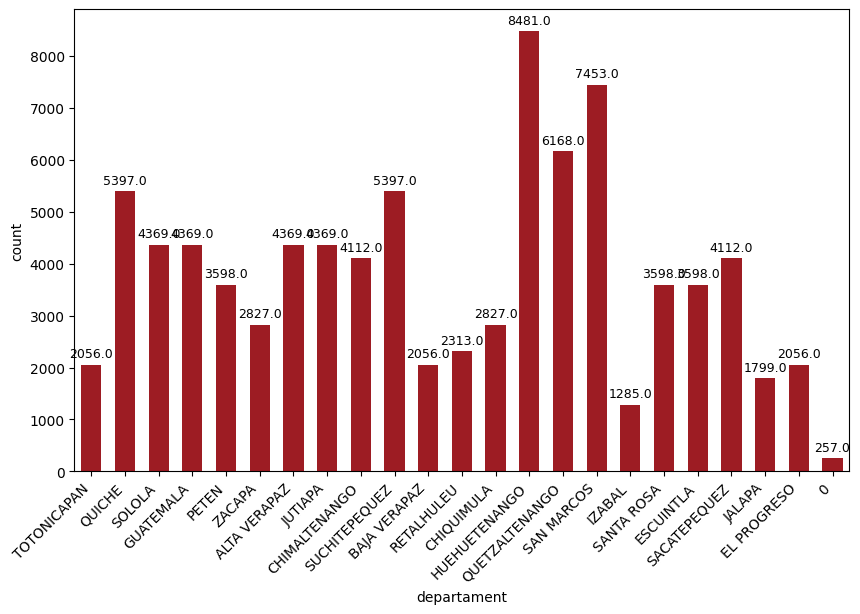

In [17]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='departament', data=df_municipality, width=0.6, palette=my_palette[1:2])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

Es posible observar que los 2 departamentos con mas registros son:
- Huehuetenango
- San Marcos

Esto se debe a que son los 2 departamentos que tienen mayor numero de municipios en el pais.

**Nota:** esta grafica no representa la cantidad de muertes por departamento, sino la cantidad de registros existentes por departamento.

#### Diagrama de Barras - Municipios

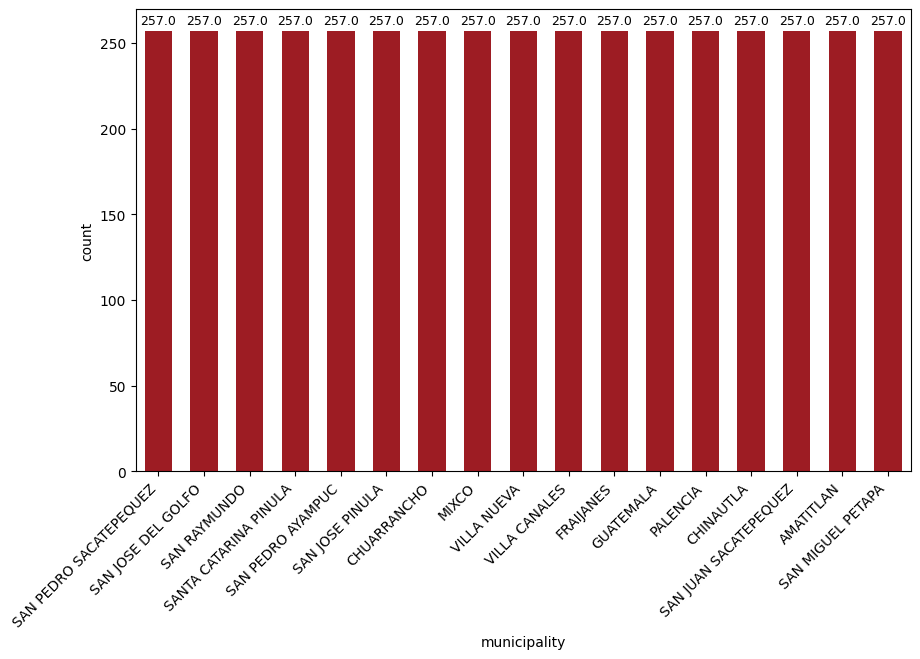

In [18]:
df_departament_GT = df_municipality[df_municipality['departament'] == 'GUATEMALA']
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='municipality', data=df_departament_GT, width=0.6, palette=my_palette[1:2])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

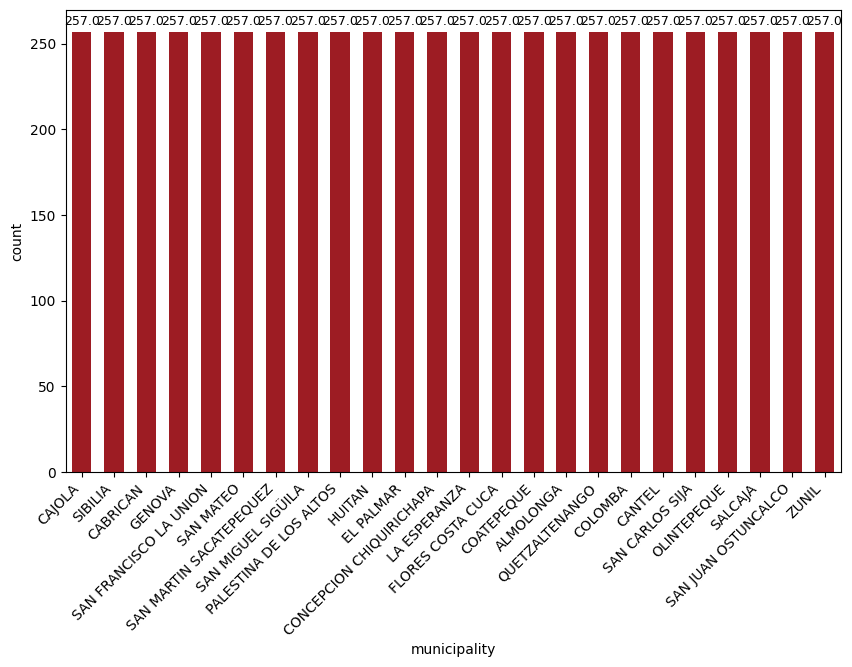

In [19]:
df_departament_GT = df_municipality[df_municipality['departament'] == 'QUETZALTENANGO']
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='municipality', data=df_departament_GT, width=0.6, palette=my_palette[1:2])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

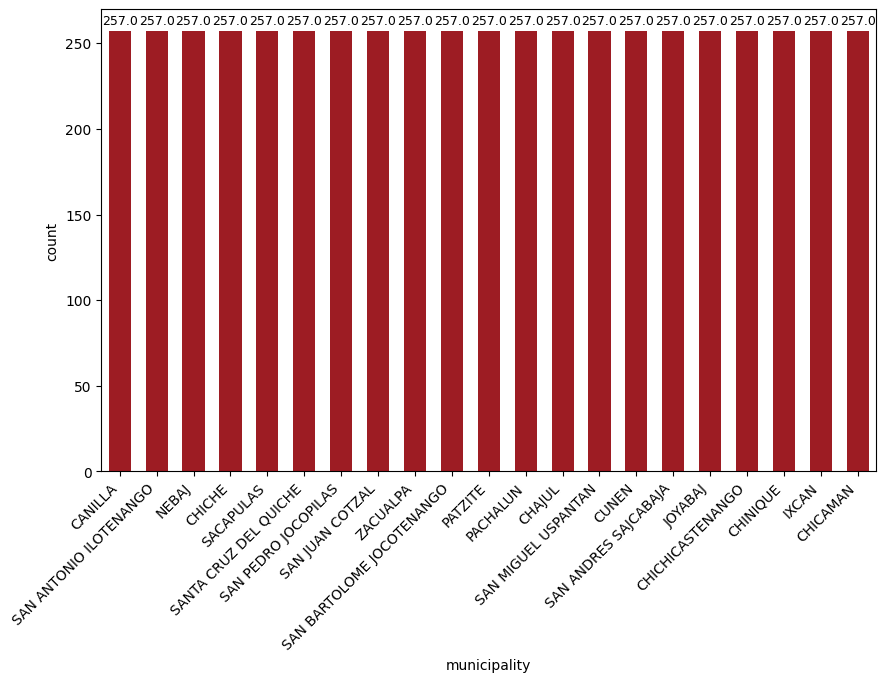

In [20]:
df_departament_GT = df_municipality[df_municipality['departament'] == 'QUICHE']
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='municipality', data=df_departament_GT, width=0.6, palette=my_palette[1:2])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

#### Analisis de Datos Cualitativos sobre Municipios

El conteo de los registros por municipio es de 257 para todos, ya que los datos proporcionados fueron datos de muertes por fecha para todo un año en especifico, sin embargo algunos datos faltantes evitan poder visualizar toda la linea de tiempo, por lo que las graficas de los municipios para los siguientes departamentos fueron:
`Guatemala`, `Quetzaltengo` y `Quiché`

Esto con la finalidad de visualizar la cantidad de muertes, para cada registro de cada departamento del interior y la ciudad capital

# Analisis EDA MultiVariable
## Dispersion entre variables muertes, muertes acumuladas y poblacion

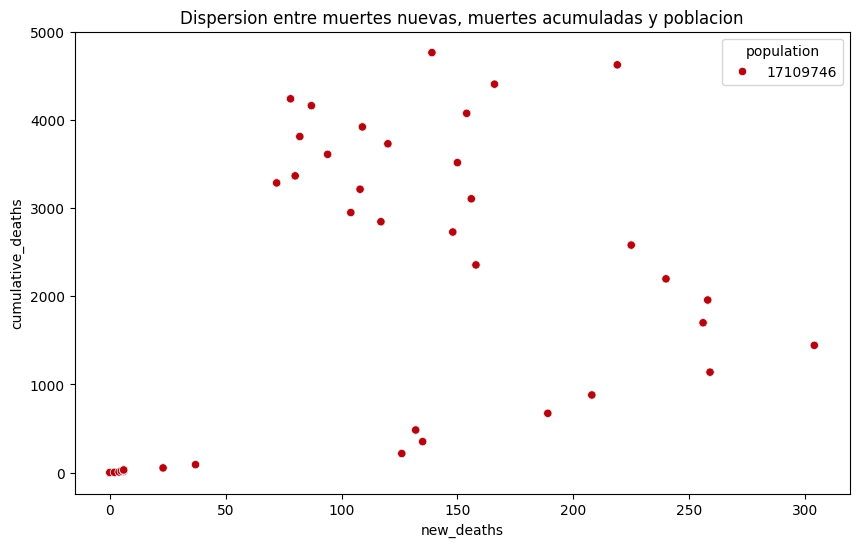

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='new_deaths', y='cumulative_deaths', data=df_summary, hue='population', palette=my_palette[1:])
ax.set_title('Dispersion entre muertes nuevas, muertes acumuladas y poblacion')
plt.show()

**Observación:**
En la grafica se puede observar las muertes se dieron en cantidades menores y de manera continua al inicio de la pandemia; es decir cuando las muertes acumuladas eran menores, mientras que las cantidades mas grandes de muertes se dieron cuando las muertes acumuladas eran mayores.

## Mapa de calor entre variables muertes, muertes acumuladas y poblacion

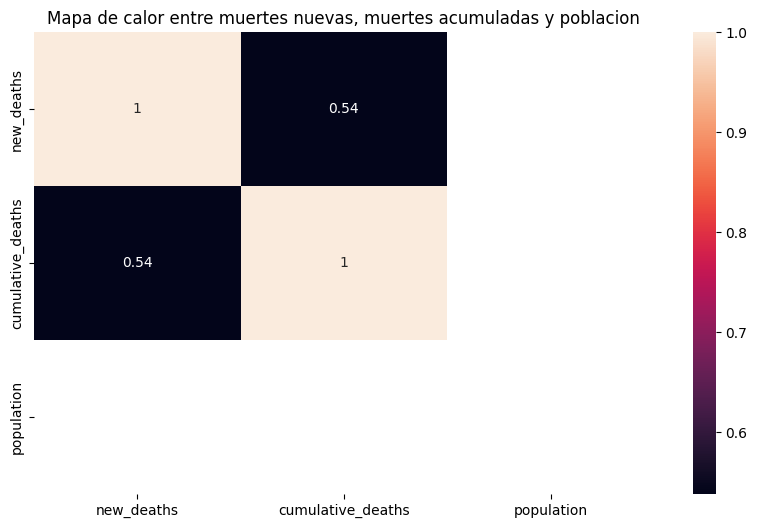

In [22]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(df_summary[['new_deaths', 'cumulative_deaths', 'population']].corr(), annot=True)
ax.set_title('Mapa de calor entre muertes nuevas, muertes acumuladas y poblacion')
plt.show()

#### Analisis sobre mapa de calor entre variables muertes, muertes acumuladas y poblacion
En el mapa no se puede observar con claridad la relación directa entre la población y las variables de mortandad, sin embargo podemos concluir que la poblacion tiene una correlacion alta con ambas variables, sin embargo la correlacion mayor es con las muertes acumuladas. Por su parte correlacion entre muertes y muertes acumuladas es moderada. 

Estas correlaciones nos indican que a mayor poblacion mayor cantidad de muertes acumuladas y nuevas muertes.

### Gráfico de barras: Municipios vs cantidad de nuevas muertes

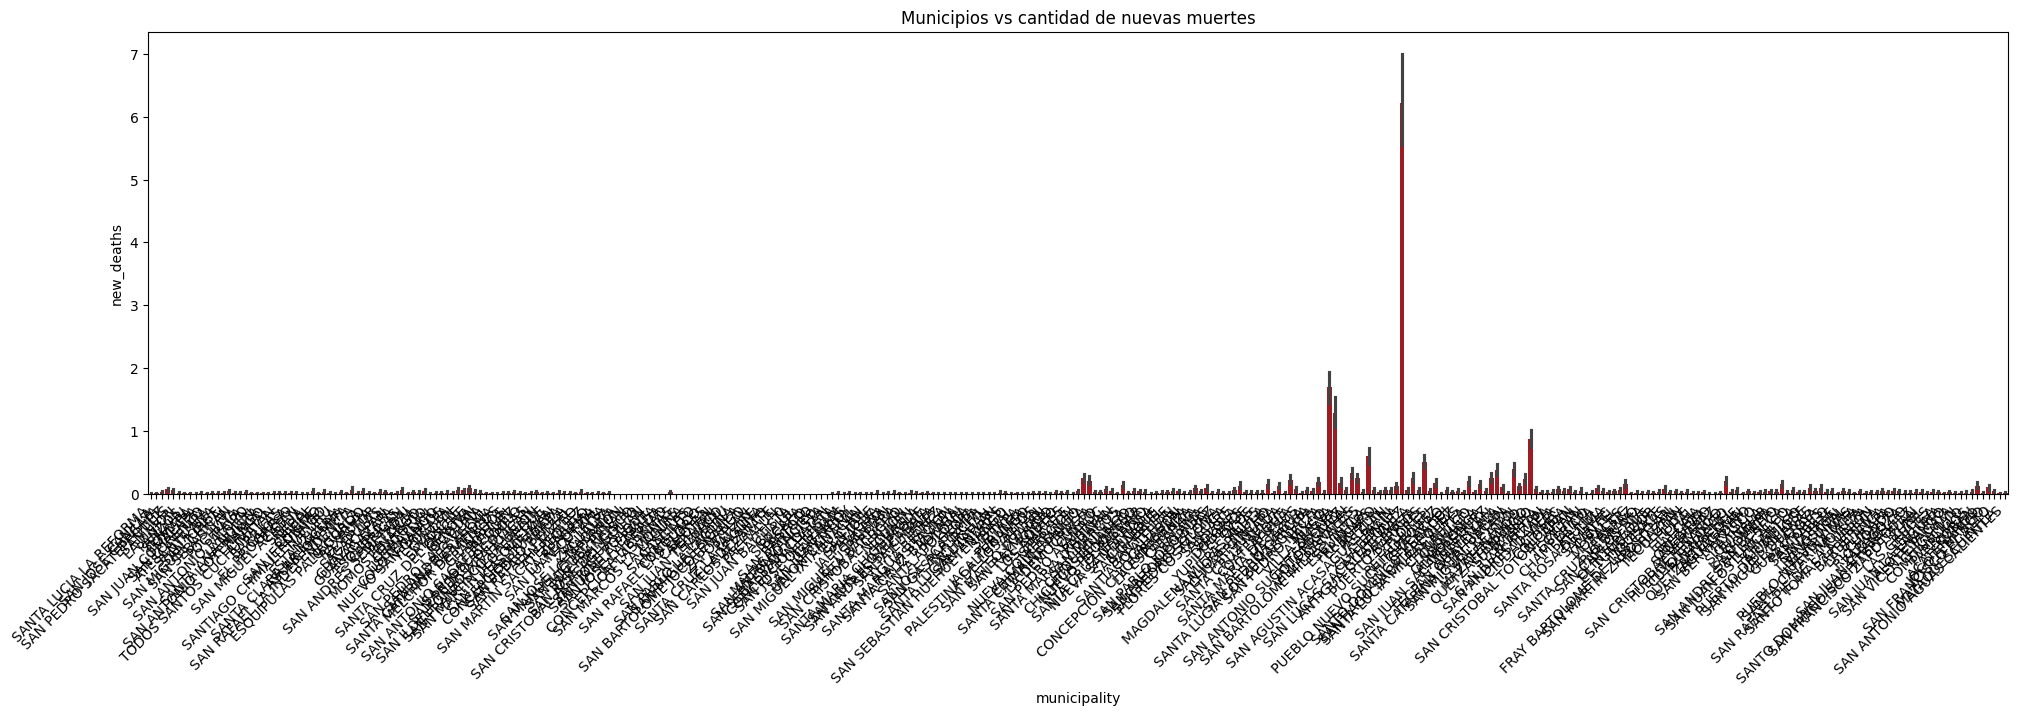

In [23]:
plt.figure(figsize=(24, 6))
ax = sns.barplot(x='municipality', y='new_deaths', data=df_municipality, palette=my_palette[1:2])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_title('Municipios vs cantidad de nuevas muertes')
plt.show()

Dicha grafica es muy complicada de interpretar, debido a la gran cantidad de datos que presenta

## Grafica de barras: Departamentos vs cantidad de nuevas muertes

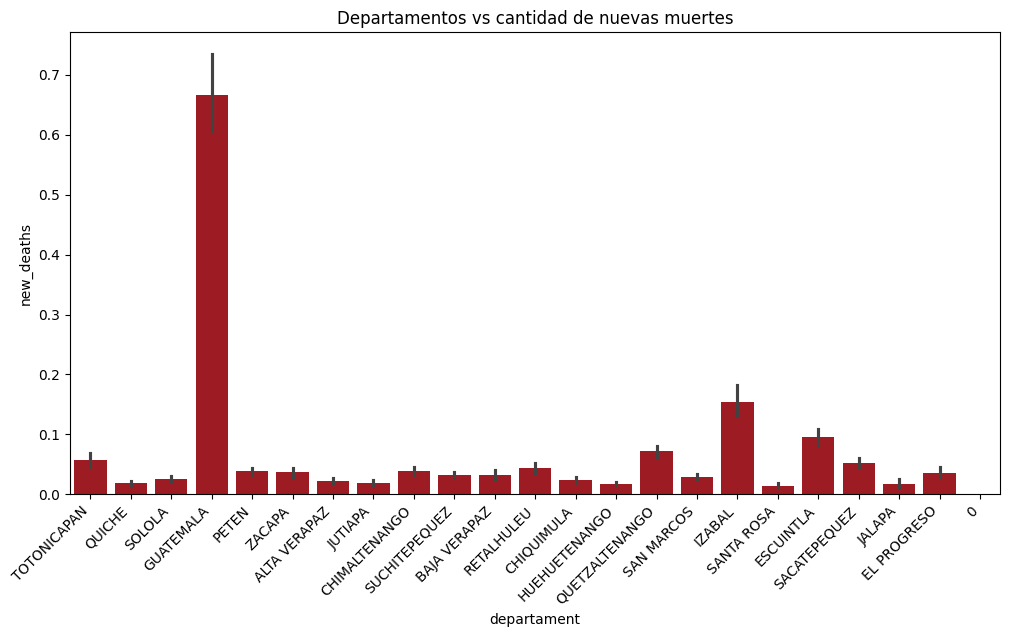

In [24]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='departament', y='new_deaths', data=df_municipality, palette=my_palette[1:2])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_title('Departamentos vs cantidad de nuevas muertes')
plt.show()

**Observaciones:** Es posible observar que el departamento con mayor cantidad de muertes, es el departamento de Guatemala, esto se debe a que es uno de los municipios con mayor densidad poblacional.

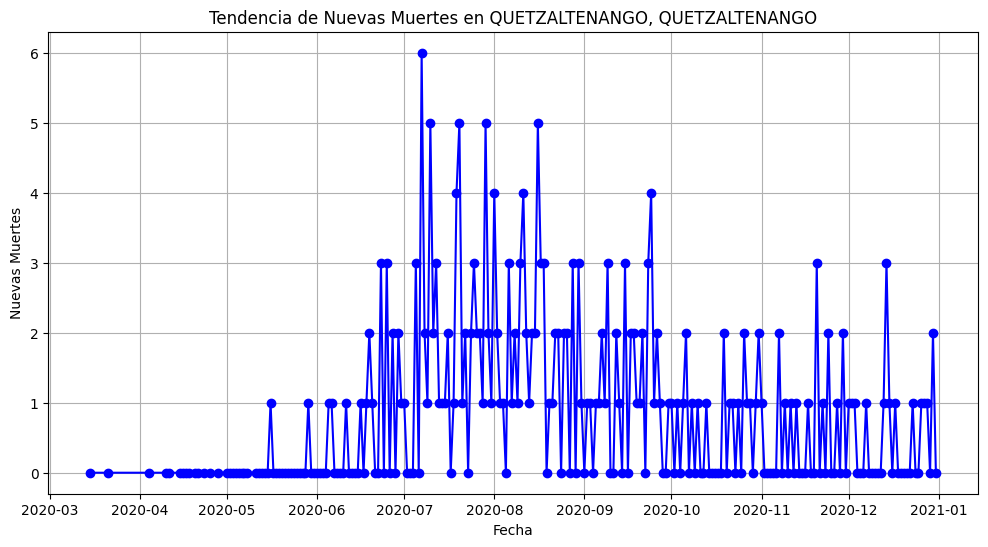

In [25]:
# Filtra los datos para un municipio y departamento específicos
municipio_especifico = 'QUETZALTENANGO'
departamento_especifico = 'QUETZALTENANGO'
df_municipio_departamento = df_municipality[(df_municipality['municipality'] == municipio_especifico) & (df_municipality['departament'] == departamento_especifico)]

# Convierte la columna 'date' a tipo datetime para asegurarte de que esté en el formato correcto
df_municipio_departamento['date'] = pd.to_datetime(df_municipio_departamento['date'])

# Ordena el DataFrame por fecha para asegurarte de que la gráfica muestre la secuencia temporal correcta
df_municipio_departamento = df_municipio_departamento.sort_values('date')

# Crea la gráfica de tendencia
plt.figure(figsize=(12, 6))
plt.plot(df_municipio_departamento['date'], df_municipio_departamento['new_deaths'], marker='o', linestyle='-', color='b')
plt.title(f'Tendencia de Nuevas Muertes en {municipio_especifico}, {departamento_especifico}')
plt.xlabel('Fecha')
plt.ylabel('Nuevas Muertes')
plt.grid(True)
plt.show()

**Observaciones:** es posible visualizar los famosos "picos" de muertes entre los meses de Julio y Septiembre, justo cuando las medidas sanitarias empezaron a flexibilizarse.

## Grafica de barras departamentos vs cantidad de muertes acumuladas

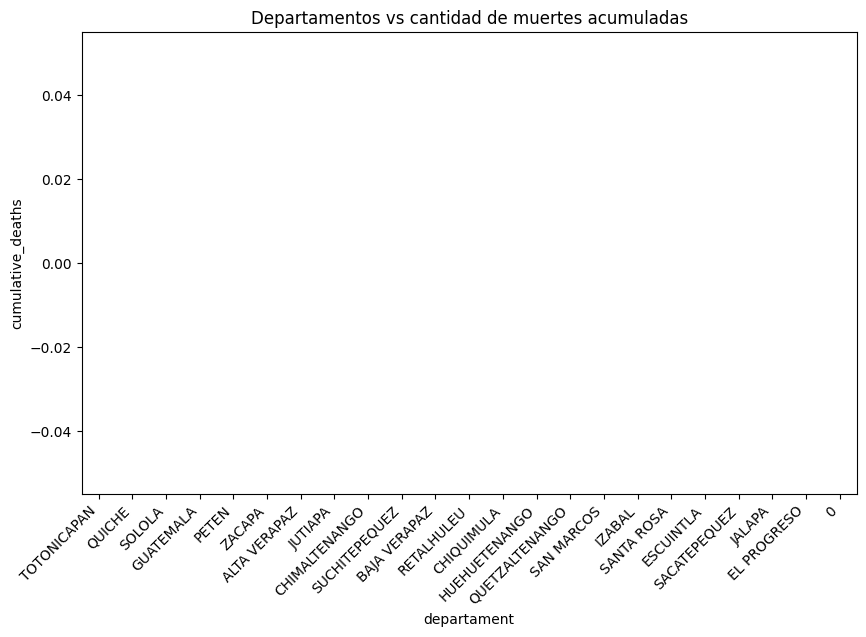

In [26]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='departament', y='cumulative_deaths', data=df_municipality, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_title('Departamentos vs cantidad de muertes acumuladas')
plt.show()

# Grafica de barras municipios vs poblacion

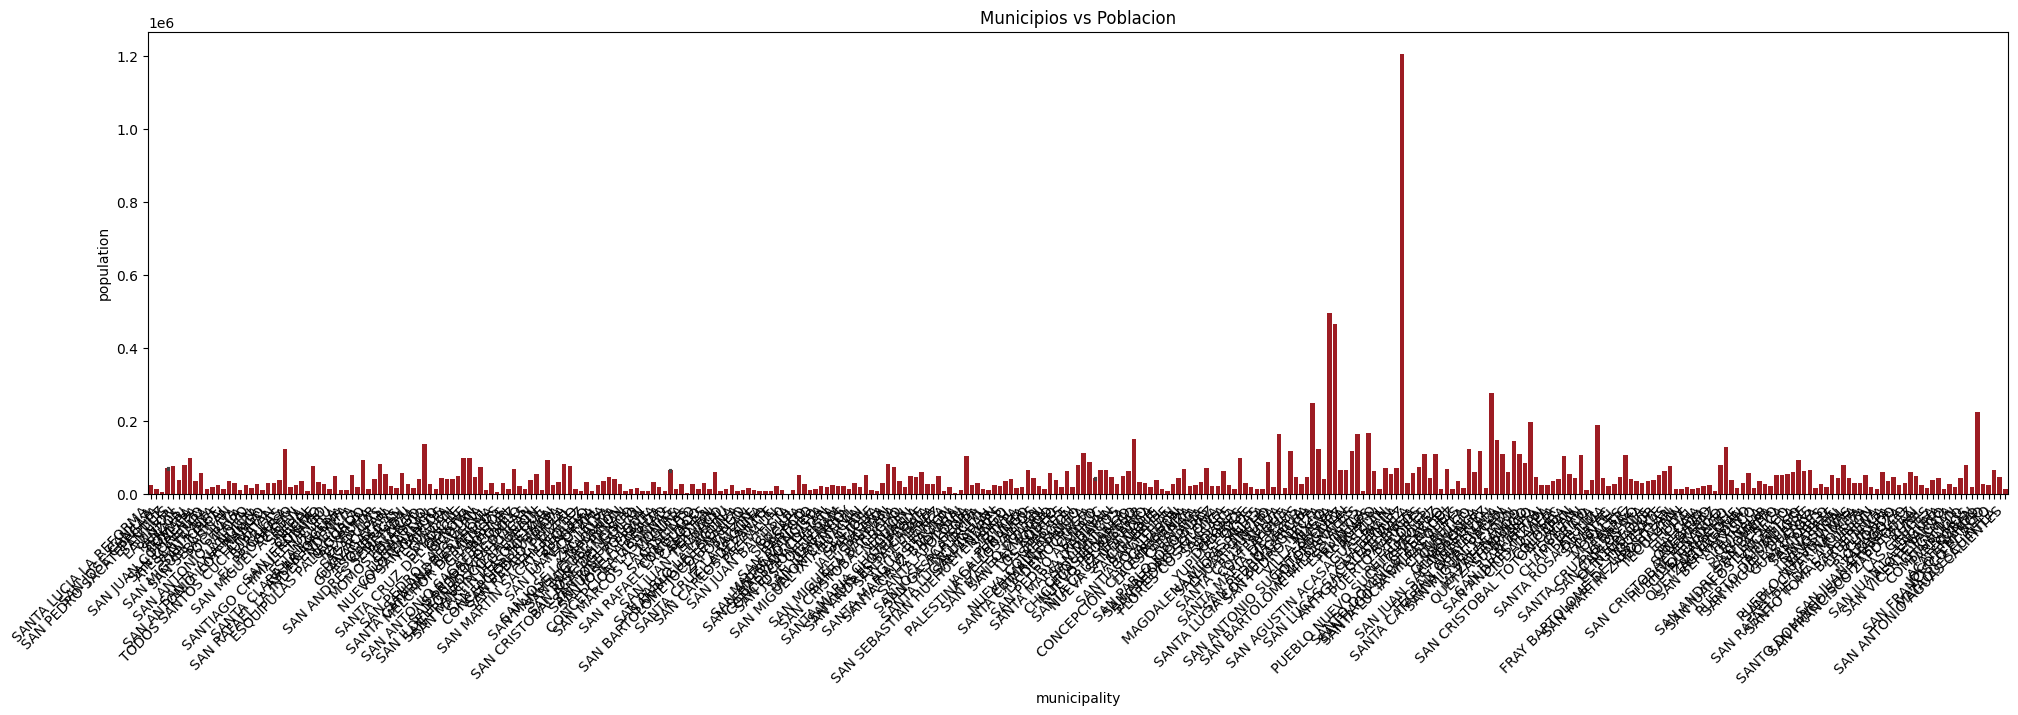

In [27]:
plt.figure(figsize=(24, 6))
ax = sns.barplot(x='municipality', y='population', data=df_municipality, palette=my_palette[1:2])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_title('Municipios vs Poblacion')
plt.show()

## Grafica de barras departamentos vs poblacion

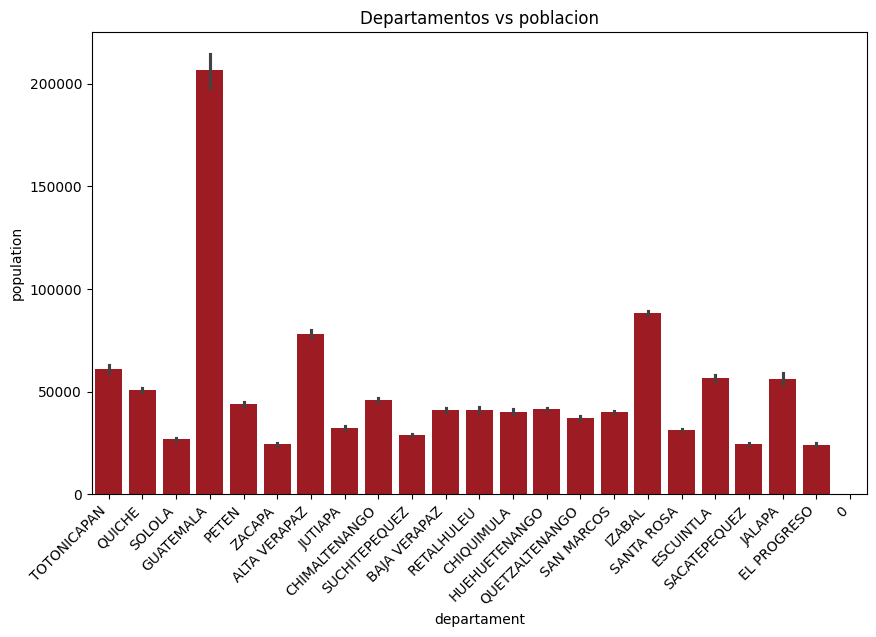

In [28]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='departament', y='population', data=df_municipality, palette = my_palette[1:2])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_title('Departamentos vs poblacion')
plt.show()

**Observación:** nuevamente es posible visualizar a Guatemala como el departamento con mayor densidad poblacional.

# Conclusiones Generales
En base a los resultados obtenidos en los analisis de datos, se puede concluir en que:
- El departamento de Guatemala es el que mayor cantidad de muertes acumula, esto debido a que es el departamento con más población en todo el país.

- Además de ser el departamento con mayor población, Guatemala tambien es el que tiene concentrado el trafico aereo del aeropuerto, por lo que gran parte de los contagios se disparan debido a esta variable que no puede ser medida de manera cuantitativa.

- Las muertes acumuladas estan relacionadas directamente con las nuevas muertes, por lo que al observar un descenso en la cantidad de muertes nuevas, podemos observar como las muertes acumuladas siguen una tendencia horizontal, indicando la normalización de las muertes.

- Las Nuevas muertes van aumentando con el paso del tiempo, por lo que se debe tomar en cuenta que las medidas sanitarias de contingencia deben ser mas estrictas al inicio de una pandemia para tratar de mantener las muertes al minimo posible.
